In [128]:
import pandas as pd

In [2]:
import pandas, sklearn, matplotlib, seaborn, nltk, bs4

In [3]:
np_lap_data = pd.read_csv("f1_lap_2098.csv", delimiter=",")

In [4]:
np_lap_data.to_csv('np_lap_data_write_for_fun.csv', index = False)

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
print(np_lap_data)

           id  lap_time_id  speed  throttle  brake  clutch  drs  engine_rpm  \
0     5857070         2098    267       100      0       0    0       10729   
1     5857071         2098    267       100      0       0    0       10759   
2     5857072         2098    267       100      0       0    0       10772   
3     5857073         2098    268       100      0       0    0       10790   
4     5857074         2098    268       100      0       0    0       10801   
...       ...          ...    ...       ...    ...     ...  ...         ...   
3420  5860490         2098    263       100      0       0    0       12080   
3421  5860491         2098    264       100      0       0    0       12108   
3422  5860492         2098    264       100      0       0    0       12122   
3423  5860493         2098    265       100      0       0    0       12147   
3424  5860494         2098    265       100      0       0    0       12160   

      steer  gear  ...  gForceLateral  gForceLongit

In [8]:
np_lap_data.loc[:,'brake']

0       0
1       0
2       0
3       0
4       0
       ..
3420    0
3421    0
3422    0
3423    0
3424    0
Name: brake, Length: 3425, dtype: int64

In [9]:
brake = np_lap_data.loc[:,'brake']
throttle = np_lap_data.loc[:,'throttle']

In [10]:
print(brake)
print(throttle)

0       0
1       0
2       0
3       0
4       0
       ..
3420    0
3421    0
3422    0
3423    0
3424    0
Name: brake, Length: 3425, dtype: int64
0       100
1       100
2       100
3       100
4       100
       ... 
3420    100
3421    100
3422    100
3423    100
3424    100
Name: throttle, Length: 3425, dtype: int64


In [11]:
time_elapsed = range(len(brake))

In [12]:
print(time_elapsed)

range(0, 3425)


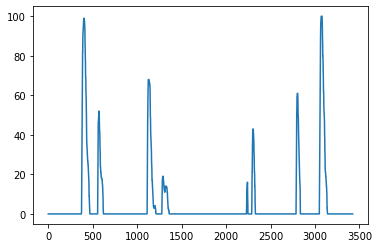

In [231]:
plt.plot(time_elapsed, brake)

In [14]:
import scipy as sp

In [15]:
from scipy.signal import find_peaks

In [244]:
peaks_brake, peak_properties_brake = find_peaks(brake, height=0, width = 5)
peaks_throttle, peak_properties_throttle = find_peaks(throttle, height=0, width = 5)

In [17]:
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(peak_properties_throttle)

{'left_bases': array([ 461,  614, 1207, 1362, 1362, 2243, 2324, 2833, 3135]),
 'left_ips': array([ 490.5       ,  685.        , 1230.5       , 1445.5       ,
       1407.        , 2258.83333333, 2348.33333333, 2851.75      ,
       3182.5       ]),
 'peak_heights': array([ 78., 100.,  73.,  73., 100.,  89., 100., 100.,  51.]),
 'prominences': array([ 78., 100.,  73.,   1., 100.,  89., 100., 100.,   7.]),
 'right_bases': array([ 562, 1123, 1283, 1456, 2234, 2298, 2795, 3061, 3199]),
 'right_ips': array([ 557.71428571, 1116.3       , 1278.94642857, 1455.5       ,
       2229.4137931 , 2292.66      , 2790.        , 3054.40909091,
       3197.75      ]),
 'width_heights': array([39. , 50. , 36.5, 72.5, 50. , 44.5, 50. , 50. , 47.5]),
 'widths': array([ 67.21428571, 431.3       ,  48.44642857,  10.        ,
       822.4137931 ,  33.82666667, 441.66666667, 202.65909091,
        15.25      ])}


In [245]:
print(peaks_brake)

[ 402  569 1128 1289 1323 2240 2302 2803 3074]


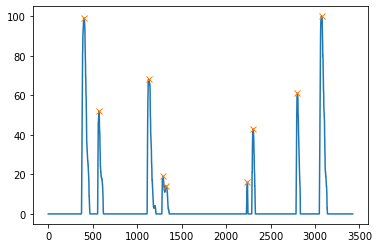

In [257]:
plt.plot(time_elapsed, brake)
plt.plot(peaks_brake, brake[peaks_brake], "x")

In [20]:
print(peaks_brake[0])

402


In [21]:
print(peaks_brake[peaks_brake>5])

[ 402  569 1128 1289 1323 2240 2302 2803 3074]


In [22]:
print(brake[brake>5])

375      8
376     15
377     22
378     29
379     36
        ..
3130    14
3131    13
3132    12
3133    11
3134    10
Name: brake, Length: 465, dtype: int64


In [23]:
all_instances_of_braking = brake[brake>5]

In [24]:
all_instances_of_braking.iloc[0]

8

In [25]:
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(peak_properties_brake)

{'left_bases': array([ 372,  555, 1111, 1277, 1310, 2228, 2288, 2787, 3049]),
 'left_ips': array([ 381.07142857,  558.83333333, 1116.07692308, 1280.25      ,
       1313.5       , 2231.71428571, 2294.07142857, 2792.0625    ,
       3056.07692308]),
 'peak_heights': array([ 99.,  52.,  68.,  19.,  14.,  16.,  43.,  61., 100.]),
 'prominences': array([ 99.,  52.,  68.,  19.,   3.,  16.,  43.,  61., 100.]),
 'right_bases': array([ 468,  620, 1211, 1360, 1360, 2246, 2329, 2836, 3140]),
 'right_ips': array([ 429.08333333,  584.71428571, 1159.        , 1339.75      ,
       1335.5       , 2242.        , 2320.25      , 2820.5       ,
       3104.        ]),
 'width_heights': array([49.5, 26. , 34. ,  9.5, 12.5,  8. , 21.5, 30.5, 50. ]),
 'widths': array([48.01190476, 25.88095238, 42.92307692, 59.5       , 22.        ,
       10.28571429, 26.17857143, 28.4375    , 47.92307692])}


In [37]:
print(type(peak_properties_brake))
left_bases = peak_properties_brake['left_bases']
left_base = peak_properties_brake['left_bases'][0]
print(left_base)  

<class 'dict'>
372


In [46]:
run_of_slope = peaks_brake[0] - left_base
print(run_of_slope)

30


In [50]:
print(peaks_brake)

[ 402  569 1128 1289 1323 2240 2302 2803 3074]


In [79]:
first_peak = peaks_brake[0]

In [73]:
value_at_first_peak = brake[first_peak.item()]
value_at_first_base = brake[left_base.item()]

In [74]:
print(value_at_first_peak,value_at_first_base)

99 0


In [77]:
slope = (value_at_first_peak - value_at_first_base) / run_of_slope

In [78]:
print(slope)

3.3


In [80]:
time = np_lap_data.loc[:,'elapsedTime']
print(time)

0        0.000
1        0.033
2        0.050
3        0.083
4        0.100
         ...  
3420    84.889
3421    84.922
3422    84.939
3423    84.972
3424    84.989
Name: elapsedTime, Length: 3425, dtype: float64


In [82]:
first_left_base_time = time[left_base.item()]
first_peak_time = time[first_peak.item()]
print(first_peak_time, first_left_base_time)

9.976 9.225


In [85]:
slope = (value_at_first_peak - value_at_first_base) / (first_peak_time - first_left_base_time)

In [86]:
print(slope)

131.8242343541942


In [127]:
Pi = []
for i in peaks_brake:
    pi = brake[i]
    Pi = numpy.append(arr, values, axis=None)[source]
        
    

NameError: name 'numpy' is not defined

In [121]:
print(Pi)

[100]


In [162]:
print(type(list(peaks_brake)))

<class 'list'>


In [223]:
y2 = []
x2 = []
for i in peaks_brake:
    pi = brake[i]
    ti = time[i]
    y2 = np.append(y2, pi, axis=None)
    x2 = np.append(x2, ti, axis=None)
print(y2)
print(x2)

[ 99.  52.  68.  19.  14.  16.  43.  61. 100.]
[ 9.976 14.097 27.982 31.969 32.82  55.558 57.093 69.574 76.28 ]


In [227]:
y1 = []
x1 = []
for i in left_bases:
    li = brake[i]
    ti = time[i]
    y1 = np.append(y1,li, axis=None)
    x1 = np.append(x1, ti, axis=None)
print(y1)
print(x1)

[ 0.  0.  0.  0. 11.  0.  0.  0.  0.]
[ 9.225 13.746 27.565 31.686 32.503 55.258 56.743 69.19  75.663]


In [225]:
all_slopes = (y2-y1)/(x2-x1)
print(all_slopes)

[131.82423435 148.14814815 163.06954436  67.13780919   9.4637224
  53.33333333 122.85714286 158.85416667 162.07455429]


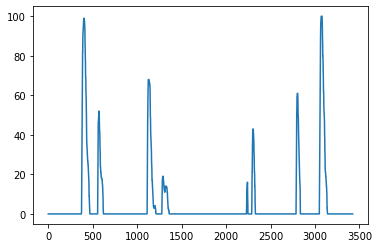

In [228]:
plt.plot(time_elapsed, brake)

In [1]:
brake = [0,0,0,0,0,0,0,0,4,5,5,5,5,6,6,6,6,7,7,7,7,7,7,7,8,8,9,10,10,10,10,10,11,11,11,11,12,12,12,12,12,13,14,15,15,17,18,19,19,19,20,20,20,20,21,21,21,22,22,22,5,5,5,24,24,24,24,25,25,25,25,25,26,26,25,25,25,26,26,27,70,72,83,92,92,94,95,98,98,98,100,100,100,100,100,100,100,100,100,100,100]
steering = [100,99,98,97,96,95,94,93,92,91,90,89,88,87,86,85,84,83,82,81,80,79,78,77,76,75,74,73,72,71,70,69,68,67,66,65,64,63,62,61,60,59,58,57,56,55,54,53,52,51,50,49,48,47,46,45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
#this is used by get_list_of_max_reccomended_braking_percent to generate a limit of braking that can be applied 

steering_brake_limit_list = dict(zip(steering, brake))  

In [2]:
print(steering_brake_limit_list)

{100: 0, 99: 0, 98: 0, 97: 0, 96: 0, 95: 0, 94: 0, 93: 0, 92: 4, 91: 5, 90: 5, 89: 5, 88: 5, 87: 6, 86: 6, 85: 6, 84: 6, 83: 7, 82: 7, 81: 7, 80: 7, 79: 7, 78: 7, 77: 7, 76: 8, 75: 8, 74: 9, 73: 10, 72: 10, 71: 10, 70: 10, 69: 10, 68: 11, 67: 11, 66: 11, 65: 11, 64: 12, 63: 12, 62: 12, 61: 12, 60: 12, 59: 13, 58: 14, 57: 15, 56: 15, 55: 17, 54: 18, 53: 19, 52: 19, 51: 19, 50: 20, 49: 20, 48: 20, 47: 20, 46: 21, 45: 21, 44: 21, 43: 22, 42: 22, 41: 22, 40: 5, 39: 5, 38: 5, 37: 24, 36: 24, 35: 24, 34: 24, 33: 25, 32: 25, 31: 25, 30: 25, 29: 25, 28: 26, 27: 26, 26: 25, 25: 25, 24: 25, 23: 26, 22: 26, 21: 27, 20: 70, 19: 72, 18: 83, 17: 92, 16: 92, 15: 94, 14: 95, 13: 98, 12: 98, 11: 98, 10: 100, 9: 100, 8: 100, 7: 100, 6: 100, 5: 100, 4: 100, 3: 100, 2: 100, 1: 100, 0: 100}
